# 1. Expoloratory Analysis of Dataset

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import sys

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/MyDrive/spotify/scripts/')
%cd /content/gdrive/MyDrive/spotify/scripts/

Mounted at /content/gdrive
/content/gdrive/MyDrive/spotify/scripts


In [ ]:
df = pd.read_csv("../data/master_data.csv")
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))

print(f"SHAPE: {df.shape}")
print(f"COLUMNS: {list(df.columns)}")
df.head()

SHAPE: (69728, 18)
COLUMNS: ['artist_name', 'album', 'track_number', 'id', 'name', 'uri', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'release_date', 'popularity', 'year']


,artist_name,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,release_date,popularity,year
0,PJ Morton,Christmas with PJ Morton (Deluxe Edition),1,6CvNgegRHO5QsQoqLrIU6b,Winter Wonderland,spotify:track:6CvNgegRHO5QsQoqLrIU6b,0.337,0.754,0.352,0.000012,0.1760,-10.380,0.0913,74.017,0.754,2020-11-20,17,2020
1,PJ Morton,Christmas with PJ Morton (Deluxe Edition),2,1tTWnveA1eKNsKFl4HhOhx,The Christmas Song,spotify:track:1tTWnveA1eKNsKFl4HhOhx,0.188,0.652,0.472,0.196000,0.0974,-9.753,0.1130,81.966,0.750,2020-11-20,15,2020
2,PJ Morton,Christmas with PJ Morton (Deluxe Edition),3,1BHyhs7E03hka3IaK8Sugo,Do You Believe (feat. Yolanda Adams),spotify:track:1BHyhs7E03hka3IaK8Sugo,0.650,0.594,0.494,0.000002,0.0913,-7.578,0.0538,134.083,0.440,2020-11-20,17,2020
3,PJ Morton,Christmas with PJ Morton (Deluxe Edition),4,5XR9fMZY35PCpBU0zn9gW8,I'll Be Home For Christmas,spotify:track:5XR9fMZY35PCpBU0zn9gW8,0.912,0.267,0.177,0.000011,0.1050,-13.918,0.0378,80.824,0.201,2020-11-20,14,2020
4,PJ Morton,Christmas with PJ Morton (Deluxe Edition),5,3Wacv2Oin9gcqvCokMSTde,All I Want For Christmas Is You (feat. Stokley),spotify:track:3Wacv2Oin9gcqvCokMSTde,0.311,0.737,0.295,0.000000,0.1410,-9.847,0.1610,70.952,0.701,2020-11-20,15,2020


In [ ]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,year
count,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000,69728.000000
mean,8.428651,0.351517,0.572700,0.565114,0.208376,0.252937,-10.167989,0.125762,116.167742,0.494510,19.965322,2010.420147
std,6.311341,0.331970,0.180028,0.241340,0.336706,0.236562,5.123357,0.150879,30.144169,0.252581,17.691774,11.692077
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1961.000000
25%,4.000000,0.046800,0.448000,0.396000,0.000001,0.100000,-12.525000,0.038600,93.005000,0.293000,5.000000,2008.000000
50%,7.000000,0.235500,0.584000,0.587000,0.001180,0.142000,-9.030000,0.057600,113.404500,0.500000,15.000000,2015.000000
75%,11.000000,0.642000,0.710000,0.757000,0.339000,0.322000,-6.596000,0.150000,134.995500,0.696000,31.000000,2018.000000
max,50.000000,0.996000,0.987000,1.000000,1.000000,1.000000,0.221000,0.969000,247.337000,0.995000,88.000000,2021.000000


In [ ]:
top_1000_songs = df.sort_values(by="popularity", ascending=False).head(1000)
top_1000_songs.head(10)

,artist_name,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,release_date,popularity,year
30905,Post Malone,Hollywood's Bleeding,6,21jGcNKet2qwijlDFuPiPb,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.19200,0.695,0.762,0.002440,0.0863,-3.497,0.0395,120.042,0.5530,2019-09-06,88,2019
41512,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2,2Fxmhks0bxGSBdJ92vM42m,bad guy,spotify:track:2Fxmhks0bxGSBdJ92vM42m,0.32800,0.701,0.425,0.130000,0.1000,-10.965,0.3750,135.128,0.5620,2019-03-29,87,2019
57004,J. Cole,The Off-Season,7,5W8jRrZ6tWrTrqnKRtIQBf,p r i d e . i s . t h e . d e v i l (with Lil ...,spotify:track:5W8jRrZ6tWrTrqnKRtIQBf,0.10400,0.861,0.656,0.000000,0.0986,-7.867,0.4250,88.967,0.3310,2021-05-14,87,2021
57000,J. Cole,The Off-Season,3,1D3z6HTiQsNmZxjl7F7eoG,m y . l i f e (with 21 Savage & Morray),spotify:track:1D3z6HTiQsNmZxjl7F7eoG,0.06220,0.597,0.587,0.000000,0.2140,-7.026,0.1370,140.021,0.0753,2021-05-14,87,2021
37202,"Tyler, The Creator",CALL ME IF YOU GET LOST,4,5B0kgjHULYJhAQkK5XsMoC,WUSYANAME (feat. Youngboy Never Broke Again & ...,spotify:track:5B0kgjHULYJhAQkK5XsMoC,0.26900,0.493,0.653,0.000000,0.5110,-5.666,0.0466,142.347,0.8520,2021-06-25,86,2021
24406,Travis Scott,Birds In The Trap Sing McKnight,9,6gBFPUFcJLzWGx4lenP6h2,goosebumps,spotify:track:6gBFPUFcJLzWGx4lenP6h2,0.08470,0.841,0.728,0.000000,0.1490,-3.370,0.0484,130.049,0.4300,2016-09-16,86,2016
54787,Ariana Grande,"thank u, next",10,6ocbgoVGwYJhOv1GgI9NsF,7 rings,spotify:track:6ocbgoVGwYJhOv1GgI9NsF,0.59200,0.778,0.317,0.000000,0.0881,-10.732,0.3340,140.048,0.3270,2019-02-08,85,2019
66667,Arctic Monkeys,AM,1,5FVd6KXrgO9B3JPmC8OPst,Do I Wanna Know?,spotify:track:5FVd6KXrgO9B3JPmC8OPst,0.18600,0.548,0.532,0.000263,0.2170,-7.596,0.0323,85.030,0.4050,2013-09-09,85,2013
57098,J. Cole,2014 Forest Hills Drive,9,62vpWI1CHwFy7tMIcSStl8,No Role Modelz,spotify:track:62vpWI1CHwFy7tMIcSStl8,0.30100,0.692,0.521,0.000000,0.0565,-8.465,0.3300,100.450,0.4630,2014-12-09,85,2014
11871,Drake,Views,12,1zi7xx7UVEFkmKfv06H8x0,One Dance,spotify:track:1zi7xx7UVEFkmKfv06H8x0,0.00776,0.792,0.625,0.001800,0.3290,-5.609,0.0536,103.967,0.3700,2016-05-06,85,2016


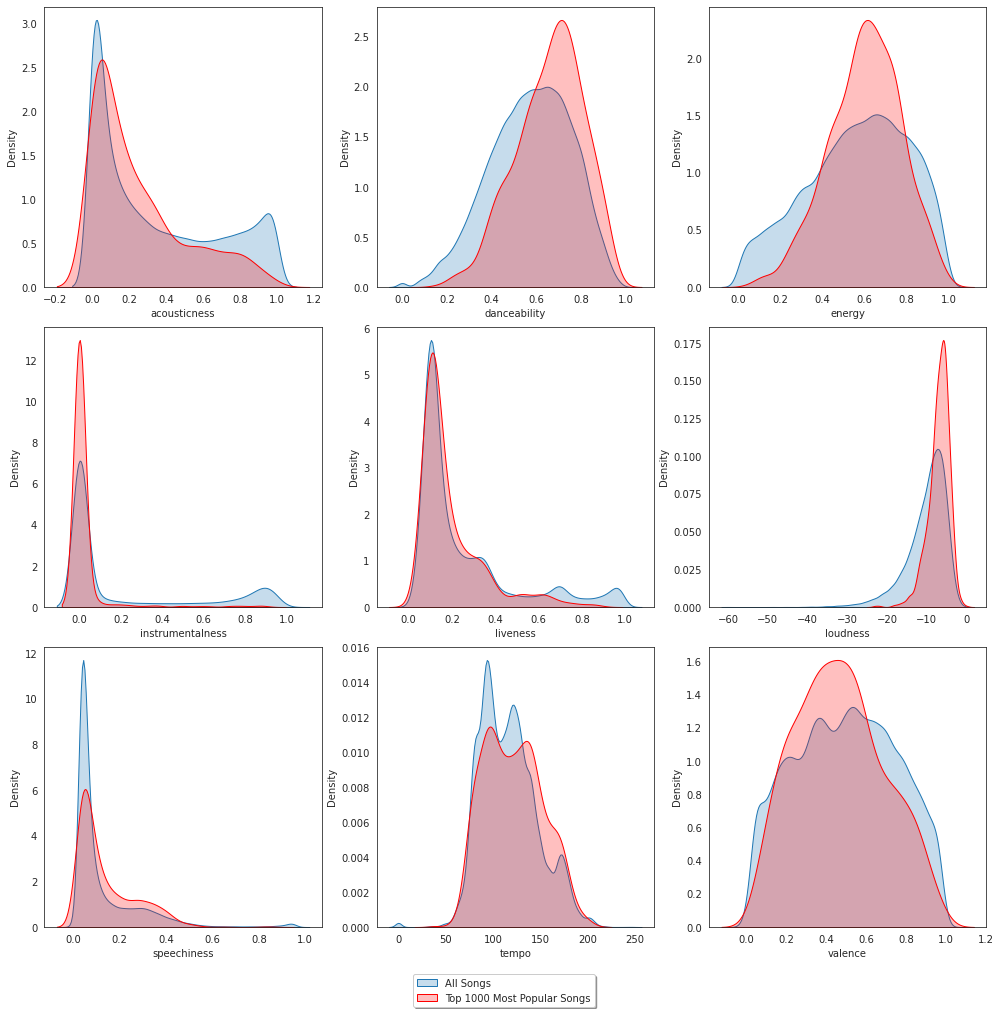

In [ ]:
sns.set_style("white")
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
plt.rcParams['figure.figsize'] = (14, 14)
fig, axes = plt.subplots(3,3)

sns.kdeplot(df[audio_features[0]], shade=True, ax=axes[0][0])
sns.kdeplot(df[audio_features[1]], shade=True, ax=axes[0][1])
sns.kdeplot(df[audio_features[2]], shade=True, ax=axes[0][2])
sns.kdeplot(df[audio_features[3]], shade=True, ax=axes[1][0])
sns.kdeplot(df[audio_features[4]], shade=True, ax=axes[1][1])
sns.kdeplot(df[audio_features[5]], shade=True, ax=axes[1][2])
sns.kdeplot(df[audio_features[6]], shade=True, ax=axes[2][0])
sns.kdeplot(df[audio_features[7]], shade=True, ax=axes[2][1])
sns.kdeplot(df[audio_features[8]], shade=True, ax=axes[2][2])

sns.kdeplot(top_1000_songs[audio_features[0]], color="red", shade=True, ax=axes[0][0])
sns.kdeplot(top_1000_songs[audio_features[1]], color="red", shade=True, ax=axes[0][1])
sns.kdeplot(top_1000_songs[audio_features[2]], color="red", shade=True, ax=axes[0][2])
sns.kdeplot(top_1000_songs[audio_features[3]], color="red", shade=True, ax=axes[1][0])
sns.kdeplot(top_1000_songs[audio_features[4]], color="red", shade=True, ax=axes[1][1])
sns.kdeplot(top_1000_songs[audio_features[5]], color="red", shade=True, ax=axes[1][2])
sns.kdeplot(top_1000_songs[audio_features[6]], color="red", shade=True, ax=axes[2][0])
sns.kdeplot(top_1000_songs[audio_features[7]], color="red", shade=True, ax=axes[2][1])
sns.kdeplot(top_1000_songs[audio_features[8]], color="red", shade=True, ax=axes[2][2])


legend = fig.legend(['All Songs', 'Top 1000 Most Popular Songs'], loc="lower center", fontsize="medium", borderaxespad=0.2, bbox_to_anchor=(0.5, 0), shadow=True)
bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)
plt.show()

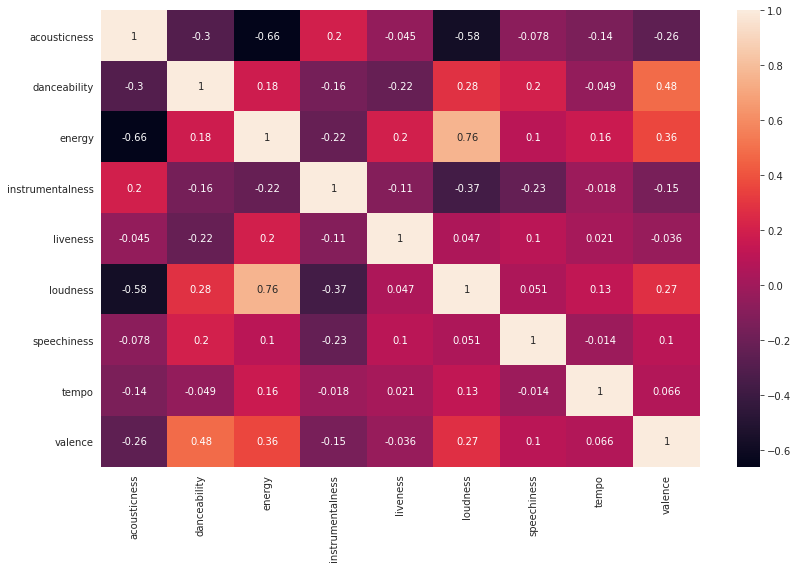

In [ ]:
corr = df[audio_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.tight_layout()

As expected we observe a strong negative correleation between the 'acousticness' and a song's 'energy' and 'loudness'. Strong positive correleation between a song's 'valency' and its 'danceablity'.

In [ ]:
yearly_features = df[[*audio_features, "year"]].groupby("year").mean().sort_values(by="year").reset_index()
# Remove loudness and tempo as these features are bounded between 0 & 1.
yearly_features.drop(labels=["loudness", "tempo"], axis=1, inplace=True)
yearly_features_melt = yearly_features.melt(id_vars="year", var_name="Audio Feature", value_name="Yearly Average of Feature Value")

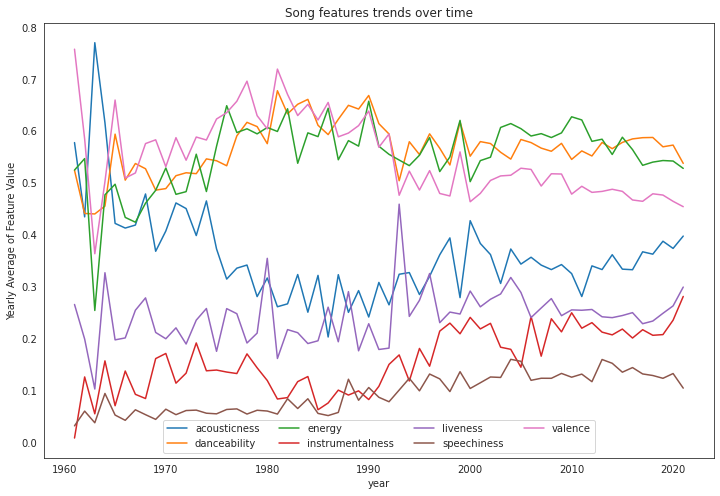

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Song features trends over time")
sns.lineplot(x="year", y="Yearly Average of Feature Value", hue="Audio Feature", data=yearly_features_melt)
plt.legend(loc="lower center", ncol=4)
plt.show()

Some of the high level trends in the average of these features can be attributed to industry wide movements. The trends are significantly more noisy in the earlier years due to the lower number of artists in these years. The dataset I have generated based on artists in my Apple Music Library which is skewed to more recent artists results in a smoother averaging after the late 90s.

We are reducing each year down to essentially the "average song" for that year, which is clearly not reflective of the breadth and depth of music released in that year. 

However we can clearly see key macro trends which correleate with various genre movements:

- Valence, danceability, and energy all peak in the late 70s / early 80s as  with the rise and then subsequent fall of the disco / boogie movements.
- Signficant rise in the amount of instrumentalness over the past 5 years which is consistent with the growing popularity of lo-fi hip hop / beats that have resulted in a large number of bedroom producers.
- Valley in acousticness around the 1990s corresponding to dominance of electronic music

In [ ]:
# plot scatter plots of each variable against popularity to identify any macro trends